# Project 1

Create a function named `calculate()` in `mean_var_std.py` that uses Numpy to output the mean, variance, standard deviation, max, min, and sum of the rows, columns, and elements in a 3 x 3 matrix. 

The input of the function should be a list containing 9 digits. The function should convert the list into a 3 x 3 Numpy array, and then return a dictionary containing the mean, variance, standard deviation, max, min, and sum along both axes and for the flattened matrix. 

The returned dictionary should follow this format:
```py
{
  'mean': [axis1, axis2, flattened],
  'variance': [axis1, axis2, flattened],
  'standard deviation': [axis1, axis2, flattened],
  'max': [axis1, axis2, flattened],
  'min': [axis1, axis2, flattened],
  'sum': [axis1, axis2, flattened]
}
```

If a list containing less than 9 elements is passed into the function, it should raise a `ValueError` exception with the message: "List must contain nine numbers." The values in the returned dictionary should be lists and not Numpy arrays.

For example, `calculate([0,1,2,3,4,5,6,7,8])` should return:
```py
{
  'mean': [[3.0, 4.0, 5.0], [1.0, 4.0, 7.0], 4.0], 
  'variance': [[6.0, 6.0, 6.0], [0.6666666666666666, 0.6666666666666666, 0.6666666666666666], 6.666666666666667], 
  'standard deviation': [[2.449489742783178, 2.449489742783178, 2.449489742783178], [0.816496580927726, 0.816496580927726, 0.816496580927726], 2.581988897471611],
  'max': [[6, 7, 8], [2, 5, 8], 8],
  'min': [[0, 1, 2], [0, 3, 6], 0],
  'sum': [[9, 12, 15], [3, 12, 21], 36]
}
```

In [1]:
import numpy as np

def calculate(list):
    
    if len(list) != 9:
        raise ValueError(' List must contain 9 digits ')
    else:
        ar1 = np.array(list)
        ar2 = ar1.reshape(3,3)
        
        m = [ar2.mean(axis=0).tolist(), ar2.mean(axis=1).tolist(), ar2.mean().tolist()]
        v = [ar2.var(axis=0).tolist(), ar2.var(axis=1).tolist(), ar2.var().tolist()]
        s = [ar2.std(axis=0).tolist(), ar2.std(axis=1).tolist(), ar2.std().tolist()]
        ma = [ar2.max(axis=0).tolist(), ar2.max(axis=1).tolist(), ar2.max().tolist()]
        mi = [ar2.min(axis=0).tolist(), ar2.min(axis=1).tolist(), ar2.min().tolist()]
        su = [ar2.sum(axis=0).tolist(), ar2.sum(axis=1).tolist(), ar2.sum().tolist()]
        
        calculations = {'mean' : m, 'variance' : v, 'standard deviation' : s, 'max' : ma , 'min' : mi, 'sum' : su}



    return calculations

In [2]:
calculate([0,1,2,3,4,5,6,7,8])

{'mean': [[3.0, 4.0, 5.0], [1.0, 4.0, 7.0], 4.0],
 'variance': [[6.0, 6.0, 6.0],
  [0.6666666666666666, 0.6666666666666666, 0.6666666666666666],
  6.666666666666667],
 'standard deviation': [[2.449489742783178,
   2.449489742783178,
   2.449489742783178],
  [0.816496580927726, 0.816496580927726, 0.816496580927726],
  2.581988897471611],
 'max': [[6, 7, 8], [2, 5, 8], 8],
 'min': [[0, 1, 2], [0, 3, 6], 0],
 'sum': [[9, 12, 15], [3, 12, 21], 36]}

# Project 2

### Assignment

# Demographic Data Analyzer

In this challenge you must analyze demographic data using Pandas. You are given a dataset of demographic data that was extracted from the 1994 Census database. Here is a sample of what the data looks like:

|    |   age | workclass        |   fnlwgt | education   |   education-num | marital-status     | occupation        | relationship   | race   | sex    |   capital-gain |   capital-loss |   hours-per-week | native-country   | salary   |
|---:|------:|:-----------------|---------:|:------------|----------------:|:-------------------|:------------------|:---------------|:-------|:-------|---------------:|---------------:|-----------------:|:-----------------|:---------|
|  0 |    39 | State-gov        |    77516 | Bachelors   |              13 | Never-married      | Adm-clerical      | Not-in-family  | White  | Male   |           2174 |              0 |               40 | United-States    | <=50K    |
|  1 |    50 | Self-emp-not-inc |    83311 | Bachelors   |              13 | Married-civ-spouse | Exec-managerial   | Husband        | White  | Male   |              0 |              0 |               13 | United-States    | <=50K    |
|  2 |    38 | Private          |   215646 | HS-grad     |               9 | Divorced           | Handlers-cleaners | Not-in-family  | White  | Male   |              0 |              0 |               40 | United-States    | <=50K    |
|  3 |    53 | Private          |   234721 | 11th        |               7 | Married-civ-spouse | Handlers-cleaners | Husband        | Black  | Male   |              0 |              0 |               40 | United-States    | <=50K    |
|  4 |    28 | Private          |   338409 | Bachelors   |              13 | Married-civ-spouse | Prof-specialty    | Wife           | Black  | Female |              0 |              0 |               40 | Cuba             | <=50K    |


You must use Pandas to answer the following questions:
* How many people of each race are represented in this dataset? This should be a Pandas series with race names as the index labels. (`race` column)
* What is the average age of men?
* What is the percentage of people who have a Bachelor's degree?
* What percentage of people with advanced education (`Bachelors`, `Masters`, or `Doctorate`) make more than 50K?
* What percentage of people without advanced education make more than 50K?
* What is the minimum number of hours a person works per week?
* What percentage of the people who work the minimum number of hours per week have a salary of more than 50K?
* What country has the highest percentage of people that earn >50K and what is that percentage?
* Identify the most popular occupation for those who earn >50K in India. 

In [3]:
import pandas as pd


def calculate_demographic_data(print_data=True):
    # Read data from file
    df = pd.read_csv('adult.data.csv')

    # Pandas series with race names as the index labels.
    race_count = df['race'].value_counts().tolist()

    # Average age of men
    average_age_men = round(df[df['sex'] == 'Male']['age'].mean(), 1)

    # Percentage of people who have a Bachelor's degree
    p = round((df[df['education'] == 'Bachelors']['education'].value_counts()/df['education'].value_counts().sum())*100, 1)
    percentage_bachelors = p.Bachelors
    
    # Percentage of people with advanced education (`Bachelors`, `Masters`, or `Doctorate`) make more than 50K
    higher_education = df[(df['education'] == 'Bachelors') | (df['education'] == 'Masters') | (df['education'] == 'Doctorate')]
    

    # Percentage of people without `Bachelors`, `Masters`, or `Doctorate`
    lower_education = df[(df['education'] != 'Bachelors') & (df['education'] != 'Masters') & (df['education'] != 'Doctorate')]

    # Percentage with salary >50K
    higher_education_rich = round((higher_education[higher_education['salary'] == '>50K']['education'].value_counts().sum()/higher_education['education'].value_counts().sum())*100, 1)
    lower_education_rich = round((lower_education[lower_education['salary'] == '>50K']['education'].value_counts().sum()/lower_education['education'].value_counts().sum())*100, 1)

    # Minimum number of hours a person works per week (hours-per-week feature)
    min_work_hours = df['hours-per-week'].min()

    # Percentage of the people who work the minimum number of hours per week have a salary of >50K
    num_min_workers = df[df['hours-per-week'] == 1]

    rich_percentage = round((num_min_workers[num_min_workers['salary'] == '>50K']['hours-per-week'].value_counts().sum()/num_min_workers['hours-per-week'].value_counts().sum())*100, 1)

    # Country with the highest percentage of people that earn >50K?
    highest_earning_country = (df[df['salary'] == '>50K']['native-country'].value_counts()/df['native-country'].value_counts()).idxmax()
    highest_earning_country_percentage = round((df[df['salary'] == '>50K']['native-country'].value_counts()/df['native-country'].value_counts()).max()*100, 1)

    # The most popular occupation for those who earn >50K in India.
    top_IN_occupation = df[(df['salary'] == '>50K') & (df['native-country'] == 'India')]['occupation'].value_counts().idxmax()

   

    if print_data:
        print("Number of each race:\n", race_count) 
        print("Average age of men:", average_age_men)
        print(f"Percentage with Bachelors degrees: {percentage_bachelors}%")
        print(f"Percentage with higher education that earn >50K: {higher_education_rich}%")
        print(f"Percentage without higher education that earn >50K: {lower_education_rich}%")
        print(f"Min work time: {min_work_hours} hours/week")
        print(f"Percentage of rich among those who work fewest hours: {rich_percentage}%")
        print("Country with highest percentage of rich:", highest_earning_country)
        print(f"Highest percentage of rich people in country: {highest_earning_country_percentage}%")
        print("Top occupations in India:", top_IN_occupation)

    return {
        'race_count': race_count,
        'average_age_men': average_age_men,
        'percentage_bachelors': percentage_bachelors,
        'higher_education_rich': higher_education_rich,
        'lower_education_rich': lower_education_rich,
        'min_work_hours': min_work_hours,
        'rich_percentage': rich_percentage,
        'highest_earning_country': highest_earning_country,
        'highest_earning_country_percentage': highest_earning_country_percentage,
        'top_IN_occupation': top_IN_occupation
    }

In [4]:
calculate_demographic_data()

Number of each race:
 [27816, 3124, 1039, 311, 271]
Average age of men: 39.4
Percentage with Bachelors degrees: 16.4%
Percentage with higher education that earn >50K: 46.5%
Percentage without higher education that earn >50K: 17.4%
Min work time: 1 hours/week
Percentage of rich among those who work fewest hours: 10.0%
Country with highest percentage of rich: Iran
Highest percentage of rich people in country: 41.9%
Top occupations in India: Prof-specialty


{'race_count': [27816, 3124, 1039, 311, 271],
 'average_age_men': 39.4,
 'percentage_bachelors': 16.4,
 'higher_education_rich': 46.5,
 'lower_education_rich': 17.4,
 'min_work_hours': 1,
 'rich_percentage': 10.0,
 'highest_earning_country': 'Iran',
 'highest_earning_country_percentage': 41.9,
 'top_IN_occupation': 'Prof-specialty'}

# Project 3


### Assignment

In this project, you will visualize and make calculations from medical examination data using matplotlib, seaborn, and pandas. The dataset values were collected during medical examinations.

#### Data description

The rows in the dataset represent patients and the columns represent information like body measurements, results from various blood tests, and lifestyle choices. You will use the dataset to explore the relationship between cardiac disease, body measurements, blood markers, and lifestyle choices.

File name: medical_examination.csv

| Feature | Variable Type | Variable      | Value Type |
|:-------:|:------------:|:-------------:|:----------:|
| Age | Objective Feature | age | int (days) |
| Height | Objective Feature | height | int (cm) |
| Weight | Objective Feature | weight | float (kg) |
| Gender | Objective Feature | gender | categorical code |
| Systolic blood pressure | Examination Feature | ap_hi | int |
| Diastolic blood pressure | Examination Feature | ap_lo | int |
| Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
| Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
| Smoking | Subjective Feature | smoke | binary |
| Alcohol intake | Subjective Feature | alco | binary |
| Physical activity | Subjective Feature | active | binary |
| Presence or absence of cardiovascular disease | Target Variable | cardio | binary |

#### Tasks

Create a chart similar to `examples/Figure_1.png`, where we show the counts of good and bad outcomes for the `cholesterol`, `gluc`, `alco`, `active`, and `smoke` variables for patients with cardio=1 and cardio=0 in different panels.

Use the data to complete the following tasks in `medical_data_visualizer.py`:
* Add an `overweight` column to the data. To determine if a person is overweight, first calculate their BMI by dividing their weight in kilograms by the square of their height in meters. If that value is > 25 then the person is overweight. Use the value 0 for NOT overweight and the value 1 for overweight.
* Normalize the data by making 0 always good and 1 always bad. If the value of `cholesterol` or `gluc` is 1, make the value 0. If the value is more than 1, make the value 1.
* Convert the data into long format and create a chart that shows the value counts of the categorical features using seaborn's `catplot()`. The dataset should be split by 'Cardio' so there is one chart for each `cardio` value. The chart should look like `examples/Figure_1.png`.
* Clean the data. Filter out the following patient segments that represent incorrect data:
  - diastolic pressure is higher than systolic (Keep the correct data with `df['ap_lo'] <= df['ap_hi'])`)
  - height is less than the 2.5th percentile (Keep the correct data with `(df['height'] >= df['height'].quantile(0.025))`)
  - height is more than the 97.5th percentile
  - weight is less than the 2.5th percentile
  - weight is more than the 97.5th percentile
* Create a correlation matrix using the dataset. Plot the correlation matrix using seaborn's `heatmap()`. Mask the upper triangle. The chart should look like `examples/Figure_2.png`.

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Import data
df = pd.read_csv('medical_examination.csv')

# Add 'overweight' column
df['overweight'] = (df['weight']/((df['height']/100)**2)).apply(lambda x : 1 if x > 25 else 0) 

# Normalize data by making 0 always good and 1 always bad. If the value of 'cholestorol' or 'gluc' is 1, make the value 0. If the value is more than 1, make the value 1.
df['cholesterol'] = df['cholesterol'].apply(lambda x : 0 if x == 1 else 1)
df['gluc'] = df['gluc'].apply(lambda x : 0 if x == 1 else 1)

# Draw Categorical Plot
def draw_cat_plot():
    # Create DataFrame for cat plot using `pd.melt` using just the values from 'cholesterol', 'gluc', 'smoke', 'alco', 'active', and 'overweight'.
    df_cat = pd.melt(df, value_vars=["active", "alco", "cholesterol", "gluc", "overweight", "smoke"], id_vars="cardio")


    # Draw the catplot with 'sns.catplot()'

    fig = sns.catplot(data=df_cat, kind="count",  x="variable", hue="value", col="cardio").set_axis_labels("variable", "total")

    fig = fig.savefig('catplot.png')
    return fig


# Draw Heat Map
def draw_heat_map():
    # Clean the data
    df_heat = df[(df['ap_lo'] <= df['ap_hi']) & 
    (df['height'] >= df['height'].quantile(0.025)) &
    (df['height'] <= df['height'].quantile(0.975)) &
    (df['weight'] >= df['weight'].quantile(0.025)) &
    (df['weight'] <= df['weight'].quantile(0.975))
    ]

    # Calculate the correlation matrix
    corr = df_heat.corr()

    # Generate a mask for the upper triangle
    mask = np.triu(np.ones_like(corr, dtype=bool))

    # Set up the matplotlib figure
    fig, ax = plt.subplots(figsize=(11, 9))

    # Draw the heatmap with 'sns.heatmap()'

    sns.heatmap(corr, annot = True, fmt='.1f', mask=mask)
    
    fig = fig.savefig('heatmap.png')
    return fig

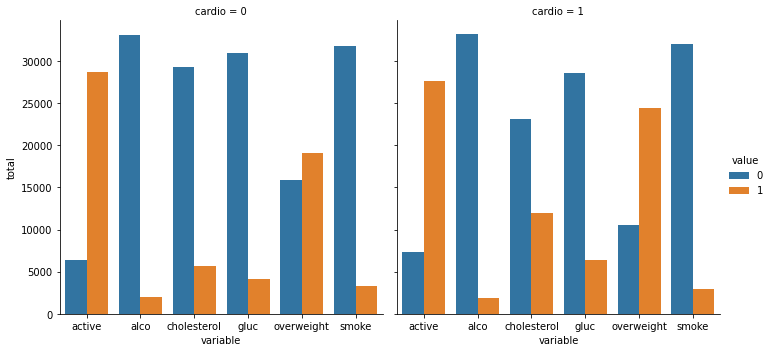

In [6]:
draw_cat_plot()

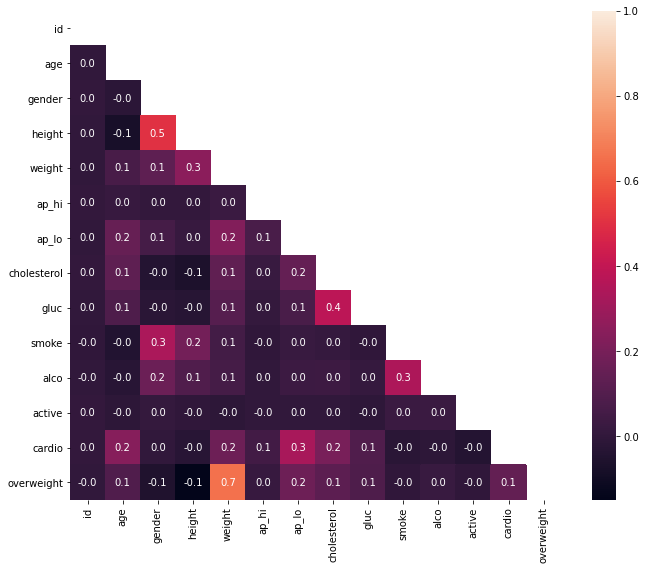

In [7]:
draw_heat_map()

# Project 4

### Assignment

For this project you will visualize time series data using a line chart, bar chart, and box plots. You will use Pandas, Matplotlib, and Seaborn to visualize a dataset containing the number of page views each day on the freeCodeCamp.org forum from 2016-05-09 to 2019-12-03. The data visualizations will help you understand the patterns in visits and identify yearly and monthly growth.

Use the data to complete the following tasks:
* Use Pandas to import the data from "fcc-forum-pageviews.csv". Set the index to the "date" column.
* Clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.
* Create a `draw_line_plot` function that uses Matplotlib to draw a line chart similar to "examples/Figure_3.png". The title should be "Daily freeCodeCamp Forum Page Views 5/2016-12/2019". The label on the x axis should be "Date" and the label on the y axis should be "Page Views".
* Create a `draw_bar_plot` function that draws a bar chart similar to "examples/Figure_4.png". It should show average daily page views for each month grouped by year. The legend should show month labels and have a title of "Months". On the chart, the label on the x axis should be "Years" and the label on the y axis should be "Average Page Views".
* Create a `draw_box_plot` function that uses Searborn to draw two adjacent box plots similar to "examples/Figure_5.png". These box plots should show how the values are distributed within a given year or month and how it compares over time. The title of the first chart should be "Year-wise Box Plot (Trend)" and the title of the second chart should be "Month-wise Box Plot (Seasonality)". Make sure the month labels on bottom start at "Jan" and the x and x axis are labeled correctly.

In [9]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Import data (Make sure to parse dates. Consider setting index column to 'date'.)
df = pd.read_csv("fcc-forum-pageviews.csv", index_col='date', parse_dates=True)

# Clean data
df = df[(df["value"] >= df["value"].quantile(0.025)) & (df["value"] <= df["value"].quantile(0.975))]


def draw_line_plot():
    # Draw line plot
    
    fig = plt.figure()
    df['value'].plot()
    plt.title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019') # titre
    plt.xlabel('Date') # axes
    plt.ylabel('Page Views') # axes


    # Save image and return fig (don't change this part)
    fig = fig.savefig('line_plot.png')
    return fig

def draw_bar_plot():
    # Copy and modify data for monthly bar plot
    df_bar = df.groupby([df.index.year, df.index.month])["value"].mean().unstack()

    # Draw bar plot
    fig = df_bar.plot(kind ="bar", figsize = (9, 9)).figure
    plt.xlabel("Years")
    plt.ylabel("Average Page Views")
    plt.legend(title = "Months", labels = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])


    # Save image and return fig
    fig = fig.savefig('bar_plot.png')
    return fig

def draw_box_plot():
    # Prepare data for box plots (this part is done!)
    df_box = df.copy()
    df_box.reset_index(inplace=True)
    df_box['year'] = [d.year for d in df_box.date]
    df_box['month'] = [d.strftime('%b') for d in df_box.date]

    # Draw box plots (using Seaborn)
    df_box["months"] = df_box["date"].dt.month
    df_box = df_box.sort_values("months")

    fig, axes = plt.subplots(1, 2, figsize = (20,12))


    axes[0] = sns.boxplot(x=df_box["year"], y=df_box["value"], ax = axes[0])
    axes[1] = sns.boxplot(x=df_box["month"], y=df_box["value"], ax = axes[1])

    axes[0].set_title("Year-wise Box Plot (Trend)")
    axes[0].set_xlabel('Year')
    axes[0].set_ylabel('Page Views')

    axes[1].set_title("Month-wise Box Plot (Seasonality)")
    axes[1].set_xlabel('Month')
    axes[1].set_ylabel('Page Views')


    # Save image and return fig
    fig = fig.savefig('box_plot.png')
    return fig

/home/anges/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:256: MatplotlibDeprecationWarning: 
The epoch2num function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  base = dates.epoch2num(dt.asi8 / 1.0e9)


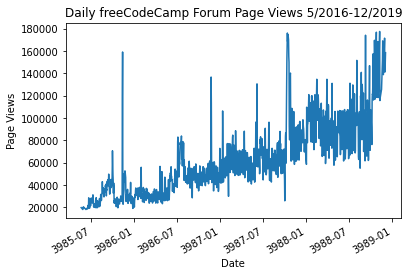

In [10]:
draw_line_plot()

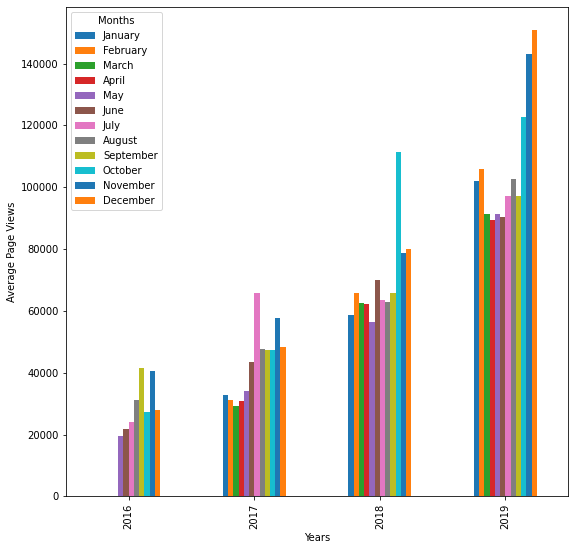

In [11]:
draw_bar_plot()

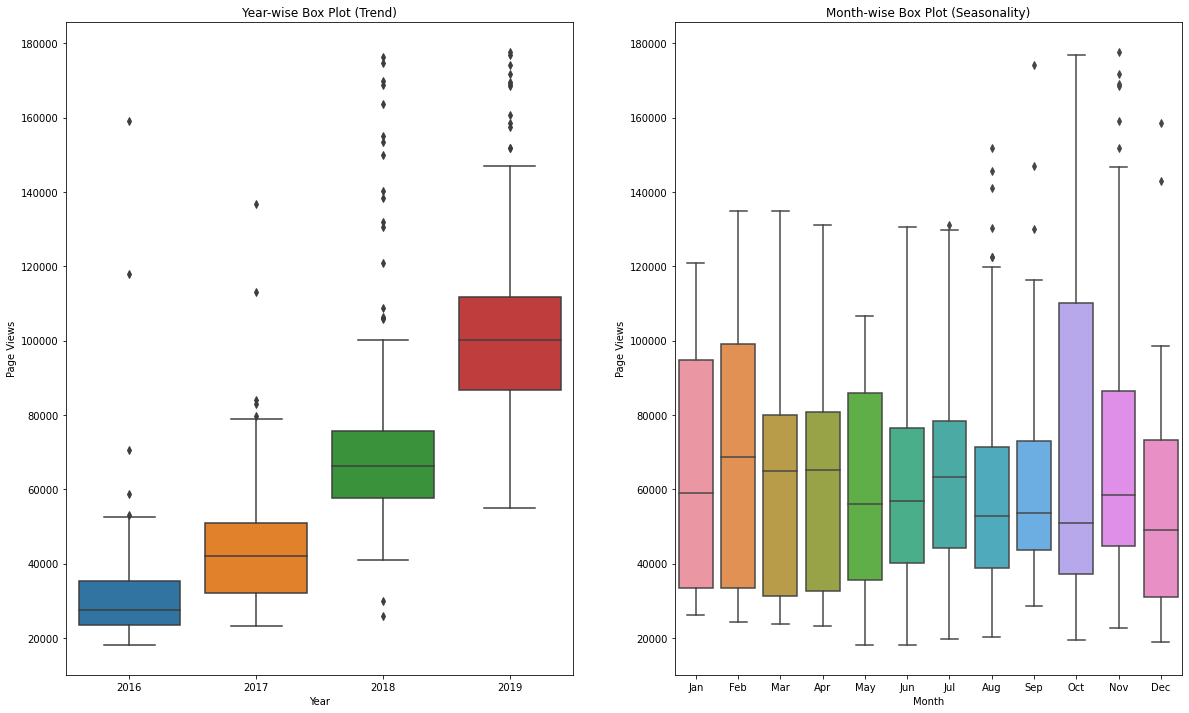

In [12]:
draw_box_plot()

# Project 5

### Assignment

You will anaylize a dataset of the global average sea level change since 1880. You will use the data to predict the sea level change through year 2050.

Use the data to complete the following tasks:
* Use Pandas to import the data from `epa-sea-level.csv`.
* Use matplotlib to create a scatter plot using the "Year" column as the x-axis and the "CSIRO Adjusted Sea Level" column as the y-axix.
* Use the `linregress` function from `scipi.stats` to get the slope and y-intercept of the line of best fit. Plot the line of best fit over the top of the scatter plot. Make the line go through the year 2050 to predict the sea level rise in 2050.
* Plot a new line of best fit just using the data from year 2000 through the most recent year in the dataset. Make the line also go through the year 2050 to predict the sea level rise in 2050 if the rate of rise continues as it has since the year 2000.
* The x label should be "Year", the y label should be "Sea Level (inches)", and the title should be "Rise in Sea Level".

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

def draw_plot():
    # Read data from file
    df = pd.read_csv('epa-sea-level.csv')

    # Create scatter plot
    plt.scatter(x=df['Year'], y=df['CSIRO Adjusted Sea Level'])

    # Create first line of best fit
    res = linregress(x=df['Year'], y=df['CSIRO Adjusted Sea Level'])
    x1 = list(range(df['Year'].min(), 2050))
    y1 = []
    for year in x1:
        y1.append(res.intercept + res.slope*year)
    
    plt.plot(x1, y1, color='red', label = 'Fitted Line 1')

    # Create second line of best fit
    res = linregress(x=df[df["Year"] >= 2000]["Year"], y=df.loc[(df["Year"] >= 2000), "CSIRO Adjusted Sea Level"])
    x2 = list(range(2000,2050))
    y2 = []
    for year in x2:
        y2.append(res.intercept + res.slope*year)
    plt.plot(x2, y2, color='green', label = 'Fitted Line 2')

    # Add labels and title
    plt.xlabel("Year")
    plt.ylabel("Sea Level (inches)")
    plt.title("Rise in Sea Level")
    
    # Save plot and return data for testing (DO NOT MODIFY)
    plt.savefig('sea_level_plot.png')
    return plt.gca()

<AxesSubplot:title={'center':'Rise in Sea Level'}, xlabel='Year', ylabel='Sea Level (inches)'>

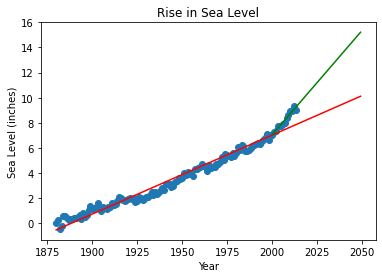

In [14]:
draw_plot()